<a href="https://colab.research.google.com/github/tung1803/NhandienGao_CNN/blob/main/NhandienGao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 0. Import
import cv2
from keras.applications.mobilenet import  MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import ModelCheckpoint

In [3]:
# 1. Định nghĩa tham số
so_lop = 9

In [4]:
# 2. Build model
def get_model():
    # Tạo base model để trích xuất các đặc trưng của ảnh
    base_model = MobileNet(include_top=False, weights="imagenet", input_shape=(224,224,3))
    # Tạo model chính :model chính sẽ được lấy dựa trên đầu ra của mobinet để làm model chính
    x = base_model.output
    # Add some new Fully connected layers to
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(512, activation='relu')(x)
    outs = Dense(so_lop, activation='softmax')(x)

    # Đóng băng các layer của base_model
    for layer in base_model.layers:
        layer.trainable = False

    model = Model(inputs=base_model.inputs, outputs= outs)
    return model

model = get_model()
model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

In [5]:
# 3. Make data
data_folder = "/content/drive/MyDrive/data/Rice_CNN"

train_datagen = ImageDataGenerator(preprocessing_function= keras.applications.mobilenet.preprocess_input,rotation_range=0.2,
                                   width_shift_range=0.2,   height_shift_range=0.2,shear_range=0.3,zoom_range=0.5,
                                   horizontal_flip=True, vertical_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_folder,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory( data_folder,  # same directory as training data
                                                          target_size=(224, 224),
                                                          batch_size=64,
                                                          class_mode='categorical',
                                                          subset='validation')  # set as validation data

classes = train_generator.class_indices
print(classes)
classes = list(classes.keys())

Found 872 images belonging to 9 classes.
Found 216 images belonging to 9 classes.
{'GaoJaponica': 0, 'GaoJasmine': 1, 'GaoLutDen': 2, 'GaoLutDo': 3, 'GaoLutGa': 4, 'GaoNepCaiHoaVang': 5, 'GaoST25': 6, 'GaoTaiNguyen': 7, 'GaoTam': 8}


In [7]:
# 4. Train model
n_epochs = 100
batch_size = 64
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('/content/drive/MyDrive/data/Rice_CNN/weight_Rice.hdf5', monitor='val_loss', save_best_only = True, mode='auto')
callback_list = [checkpoint]

step_train = train_generator.n//batch_size
step_val = validation_generator.n//batch_size

history=model.fit_generator(generator=train_generator, steps_per_epoch=step_train,
                    validation_data=validation_generator,
                    validation_steps=step_val,
                    callbacks=callback_list,
                    epochs=n_epochs)
# Lưu cấu trúc file dưới dạng jason file
model_json = model.to_json()
with open("model_cc.json", "w") as json_file:
    json_file.write(model_json)
# 5. Lưu model
model.save('/content/drive/MyDrive/data/Rice_CNN/model_Rice.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/100
13/13 [==============================] - 47s 4s/step - loss: 0.5355 - accuracy: 0.9097 - val_loss: 0.3612 - val_accuracy: 0.9531
Epoch 2/100
13/13 [==============================] - 45s 3s/step - loss: 0.4015 - accuracy: 0.9418 - val_loss: 0.2536 - val_accuracy: 0.9844
Epoch 3/100
13/13 [==============================] - 45s 3s/step - loss: 0.3111 - accuracy: 0.9554 - val_loss: 0.1924 - val_accuracy: 0.9688
Epoch 4/100
13/13 [==============================] - 45s 3s/step - loss: 0.2659 - accuracy: 0.9567 - val_loss: 0.1302 - val_accuracy: 0.9740
Epoch 5/100
13/13 [==============================] - 45s 3s/step - loss: 0.2301 - accuracy: 0.9653 - val_loss: 0.1420 - val_accuracy: 0.9792
Epoch 6/100
13/13 [==============================] - 45s 3s/step - loss: 0.1949 - accuracy: 0.9653 - val_loss: 0.1473 - val_accuracy: 0.9844
Epoch 7/100
13/13 [==============================] - 45s 3s/step - loss: 0.1600 - accuracy: 0.9777 - val_loss: 0.1139 - val_accuracy: 0.9635
Epoch 8/100
1

sai so kiem tra la:  0.003841941710561514
do chinh xac kiem tra la:  0.9988532066345215


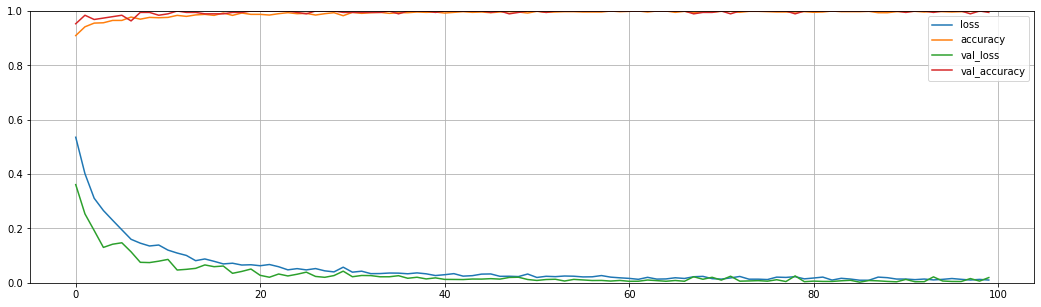

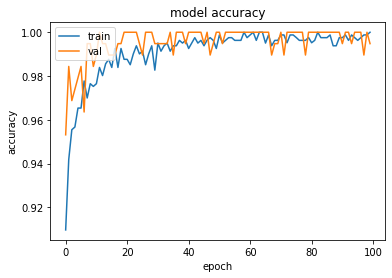

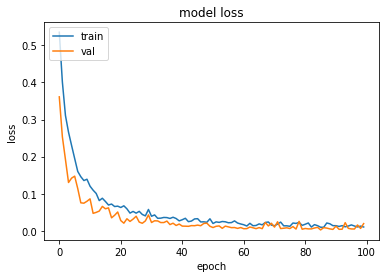

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import pandas as pd

# danh gia do chinh xac cua CNN
score = model.evaluate(train_generator, verbose = 0)
print('sai so kiem tra la: ', score[0])
print('do chinh xac kiem tra la: ', score[1])

# Diagram
pd.DataFrame(history.history).plot(figsize = (18,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [9]:
#Load model đã train
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/data/Rice_CNN/model_Rice.h5")

In [10]:
#Tạo lớp train model
classes = ['GaoJaponica', 'GaoJasmine', 'GaoLutDen', 'GaoLutDo', 'GaoLutGa', 'GaoNepCaiHoaVang', 'GaoST25', 'GaoTaiNguyen', 'GaoTam']

[[1.0979350e-03 1.1195863e-02 1.4258053e-02 4.9561518e-04 1.8111266e-03
  7.7120352e-01 9.3902141e-04 1.9741920e-01 1.5796520e-03]]


'GaoNepCaiHoaVang'

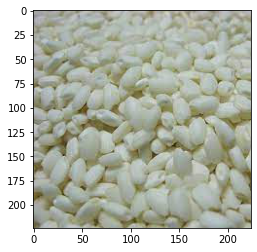

In [17]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
#Test dữ liệu
img=load_img('Nep1.jpg',target_size=(224,224,3))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,224,224,3)
img=img.astype('float32')
img=img/255
#result=model.predict(img)
print(model.predict(img))

#print(result)
classes[int(np.argmax(model.predict(img), axis=1))]